In [1]:
# import libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# import the dataset
df= pd.read_csv('Crop Production data.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
# check the shape of the dataset
df.shape

(246091, 7)

- There is 246091 rows and 7 columns

In [5]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


- We can see that there is some null values in the dataset. Now we check the null values 

In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

- Production column has some null values in it. This is a Numerical Column. Now we check the percentage of the null values

In [7]:
df.isnull().mean()*100

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

- We Observed that there is only 1.51 percent null values in it. We fill this null values by its mean calculation

In [8]:
df['Production'].fillna(df['Production'].mean(), inplace= True)

In [9]:
# let's check the null values again
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

- Now we see that there is no null values in the dataset

In [10]:
# Now we check the numeical columns description
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.693599e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.880000e+02
75%,2010.000000,4.392000e+03,8.000000e+03
max,2015.000000,8.580100e+06,1.250800e+09


- # Univariate Analysis
  

In [11]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [12]:
state = df['State_Name'].value_counts()
state.head(10)

State_Name
Uttar Pradesh     33306
Madhya Pradesh    22943
Karnataka         21122
Bihar             18885
Assam             14628
Odisha            13575
Tamil Nadu        13547
Maharashtra       12628
Rajasthan         12514
Chhattisgarh      10709
Name: count, dtype: int64

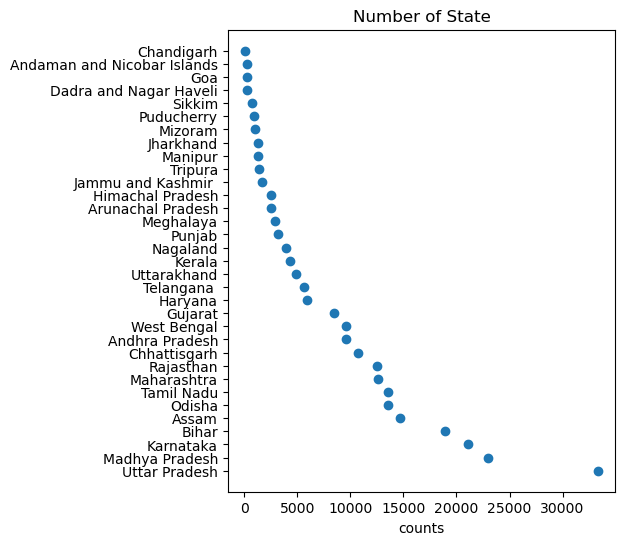

In [13]:
plt.figure(figsize = (5,6))
plt.title('Number of State')
plt.scatter(state.values, state.index)
plt.xlabel('counts');


- Uttar Pradesh is overrepresented in the dataset, as evidenced by the univariate analysis graph showing its higher frequency of occurrences. Madhya Pradesh, Karnataka, and Bihar follow in terms of the number of entries. This suggests that, overall, the number of crops recorded is higher in these states.

In [14]:
# value counts of the 'District_Name
Dist = df['District_Name'].value_counts().head(10)
Dist

District_Name
BIJAPUR           945
TUMKUR            936
BELGAUM           925
HASSAN            895
BELLARY           887
DAVANGERE         886
AURANGABAD        879
HAVERI            870
CHAMARAJANAGAR    844
CHITRADURGA       840
Name: count, dtype: int64

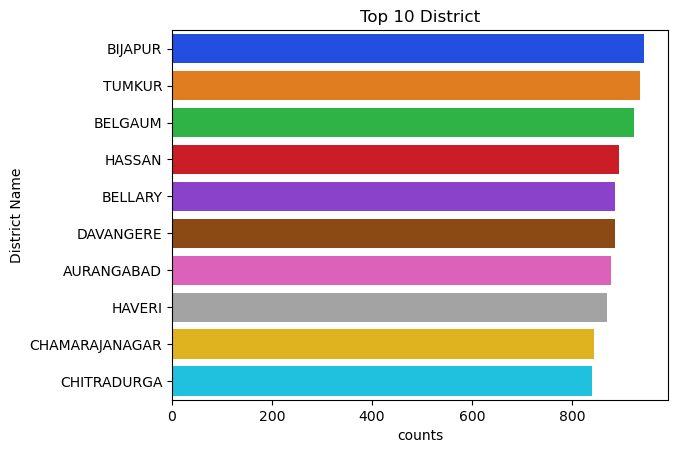

In [15]:
# Top 10 District according to the crop production
plt.title('Top 10 District')
sns.barplot(x = Dist.values, y = Dist.index, palette = 'bright')
plt.ylabel('District Name')
plt.xlabel('counts');

- We see that among the top 10 districts, Bijapur has the highest number of entries. It is followed by Tumkur, Belgaum, and Hassan.

In [16]:
# value counts of Season Crops
season = df['Season'].value_counts()
season

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

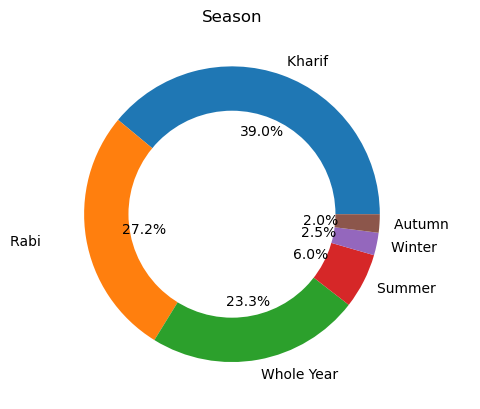

In [17]:
# plot a pie plot for Season Crops
plt.title('Season')
plt.pie(season.values, labels = season.index, autopct = '%1.1f%%')
center_circle = plt.Circle((0,0),0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle);

- We observe that the number of crops in the Kharif season is the highest, followed by the Rabi season. The number of crops in the Autumn season is the lowest

In [18]:
crop = df['Crop'].value_counts()
crop.head(10)

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: count, dtype: int64

''

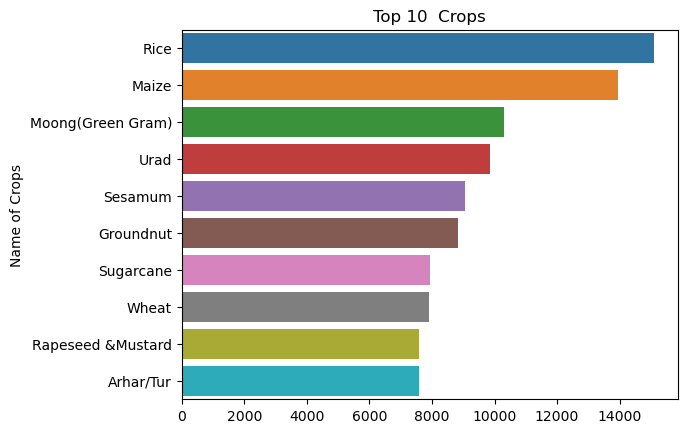

In [19]:
# Plot the 'Crop' column 
plt.title('Top 10  Crops')
sns.barplot(x = crop.head(10).values,y = crop.head(10).index)
plt.ylabel('Name of Crops')
;

- The number of Rice entries is the highest, followed by Maize. Moong (Green Gram), Urad, Sesame, Groundnut, and Sugarcane follow in descending order.

In [20]:
# Plot a distplot for Area
df['Area']

0           1254.0
1              2.0
2            102.0
3            176.0
4            720.0
            ...   
246086       306.0
246087       627.0
246088       324.0
246089    279151.0
246090       175.0
Name: Area, Length: 246091, dtype: float64

In [21]:
df['Area'].describe()

count    2.460910e+05
mean     1.200282e+04
std      5.052340e+04
min      4.000000e-02
25%      8.000000e+01
50%      5.820000e+02
75%      4.392000e+03
max      8.580100e+06
Name: Area, dtype: float64

In [22]:
df['Production'].describe()

count    2.460910e+05
mean     5.825034e+05
std      1.693599e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.880000e+02
75%      8.000000e+03
max      1.250800e+09
Name: Production, dtype: float64

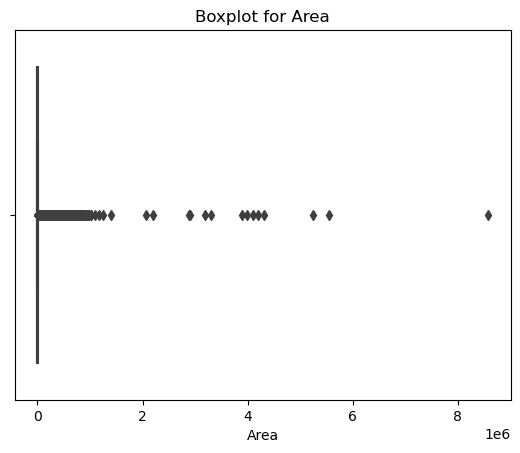

In [23]:
# box plot for Area
plt.title('Boxplot for Area')
sns.boxplot(df, x= 'Area')
plt.xlabel('Area');

- There is too much outliers in the Area boxplot. So we make a new column for Area 

In [24]:
q1 = df['Area'].quantile(0.25)
q2 = df['Area'].quantile(0.75)
iqr = q1 - q2
lower_bound = q1 - iqr*1.5
upper_bound = q2 - iqr*1.5
print(lower_bound)
print(upper_bound)

6548.0
10860.0


In [25]:
# make a new column related to area
def area_category(area):
    if area < 6548:
        return 'Small Area'
    elif 6548 <= area <= 10860:
        return 'Medium Area'
    else:
        return 'Huge Area'
df['Area_category'] = df['Area'].apply(area_category)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Area_category
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Small Area
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Small Area
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Small Area
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Small Area
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Small Area


In [26]:
# value counts of Area_category
df['Area_category'].value_counts()

Area_category
Small Area     194460
Huge Area       40705
Medium Area     10926
Name: count, dtype: int64

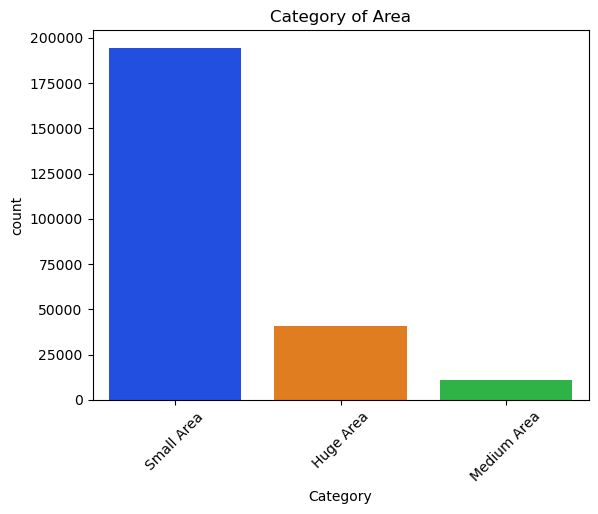

In [27]:
# plot the Area_category
plt.title('Category of Area')
sns.countplot(df, x = 'Area_category', palette = 'bright')
plt.xlabel('Category')
plt.xticks(rotation = 45);

- Number of small areas is high than Huge type Area and Medium Type Area

<Axes: xlabel='Production'>

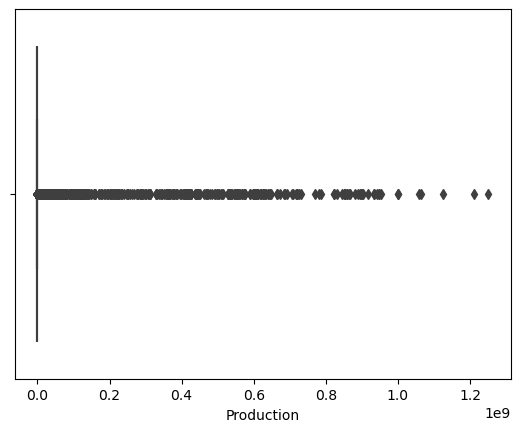

In [28]:
# plot a boxplot of Production 
sns.boxplot(df, x = 'Production')

- There is so many outliers in the Production column also
so we also make new column for the prouction 

In [29]:
# find the outliers for the Production
q1 = df['Production'].quantile(0.25)
q2 = df['Production'].quantile(0.75)
iqr = q1- q2
lower_bound = q1 - iqr*1.5
upper_bound = q2 - iqr*1.5
print(lower_bound)
print(upper_bound)

11954.5
19863.5


In [30]:
# make a new columns
def prod_cat(prod):
    if prod < 11954.5:
        return 'Minimum Production'
    elif 11954.5 <= prod <= 19863.5:
        return 'Medium Production'
    else:
        return 'Maximum Production'
df['Production_category'] = df['Production'].apply(prod_cat)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Area_category,Production_category
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Small Area,Minimum Production
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Small Area,Minimum Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Small Area,Minimum Production
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Small Area,Minimum Production
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Small Area,Minimum Production


In [31]:
# let's chcek the values counts of the Production Category
df['Production_category'].value_counts()

Production_category
Minimum Production    192844
Maximum Production     43787
Medium Production       9460
Name: count, dtype: int64

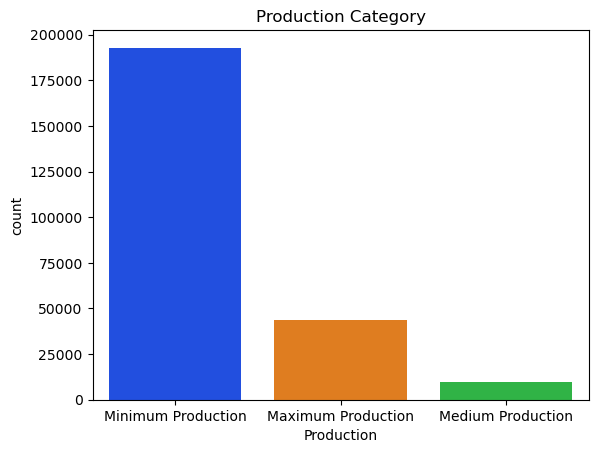

In [32]:
# lets make a countplot for the Production category
plt.title('Production Category')
sns.countplot(df, x = 'Production_category', palette = 'bright')
plt.xlabel('Production');

- Production rate is  Minimum in India. Rate of maximum Production is very low. 

- # Bi  - variate Analysis

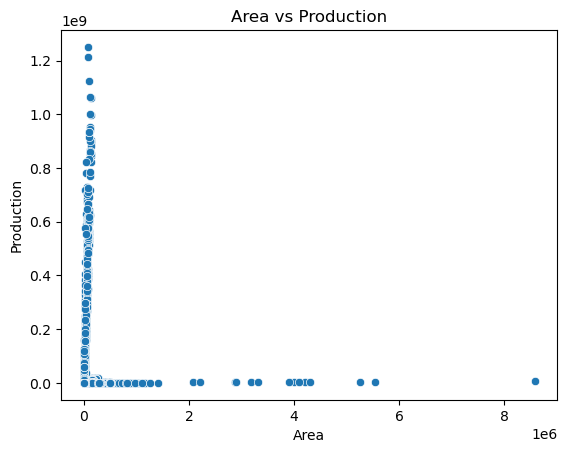

In [33]:
# plot the Area vs Production 
plt.title("Area vs Production")
sns.scatterplot(df, x = 'Area', y = 'Production');

- Maximum number of production is happen in Minimum Area. (around 0-1 le6 )

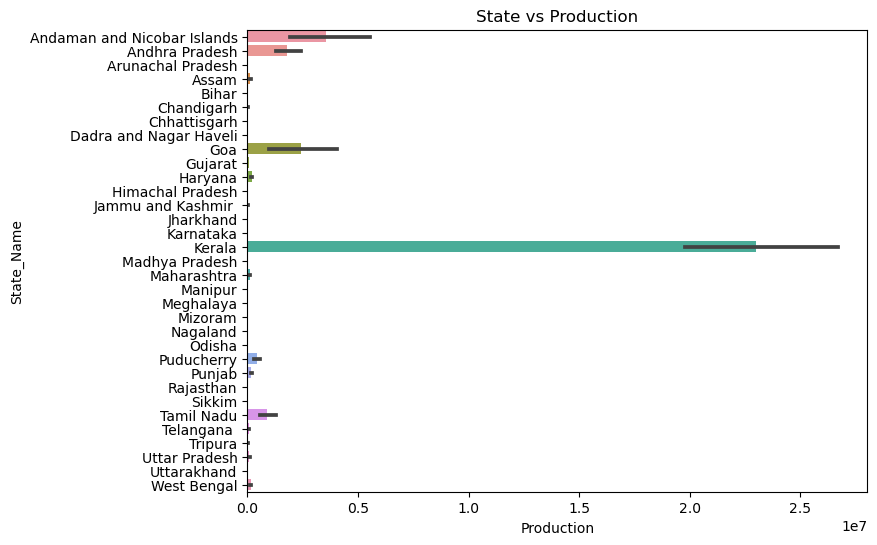

In [34]:
plt.figure(figsize = (8,6))
plt.title('State vs Production')
sns.barplot(df, y = 'State_Name', x = 'Production') ;

- The highest production is in the state of Kerala in India. Following Kerala are the Andaman and Nicobar Islands, Goa, and Andhra Pradesh.

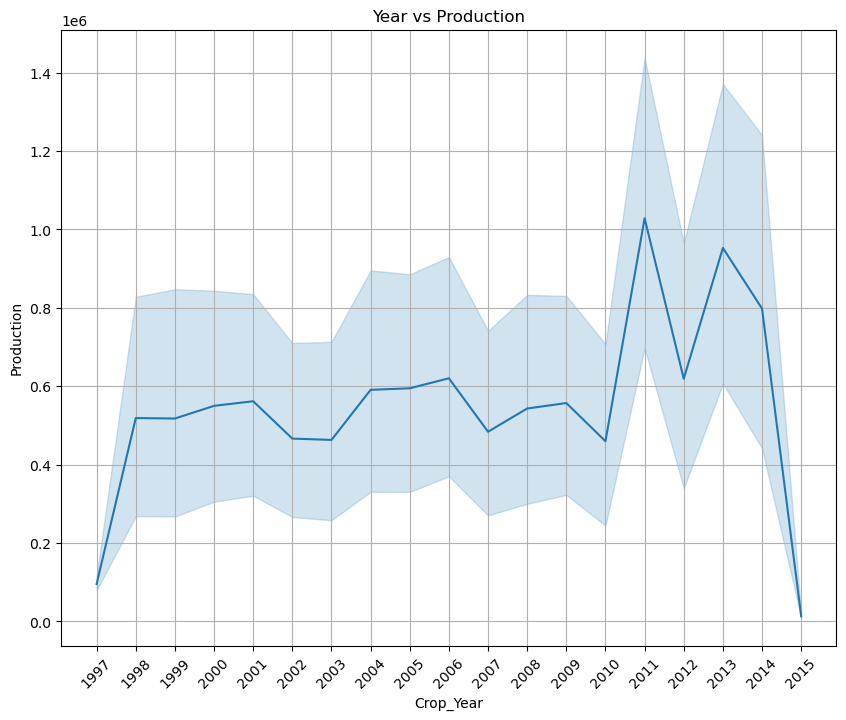

In [35]:
# Year vs Production 
# Group by year and sum the production
yearly_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

plt.figure(figsize = (10,8))
plt.title('Year vs Production')
sns.lineplot(df, x = 'Crop_Year', y = 'Production')
plt.grid(True)
plt.xticks(ticks=yearly_production['Crop_Year'], rotation=45);

- The production rate was high in the year 2011. It declined in 2012, started to increase again in 2013, and reached a very low point in 2015.

''

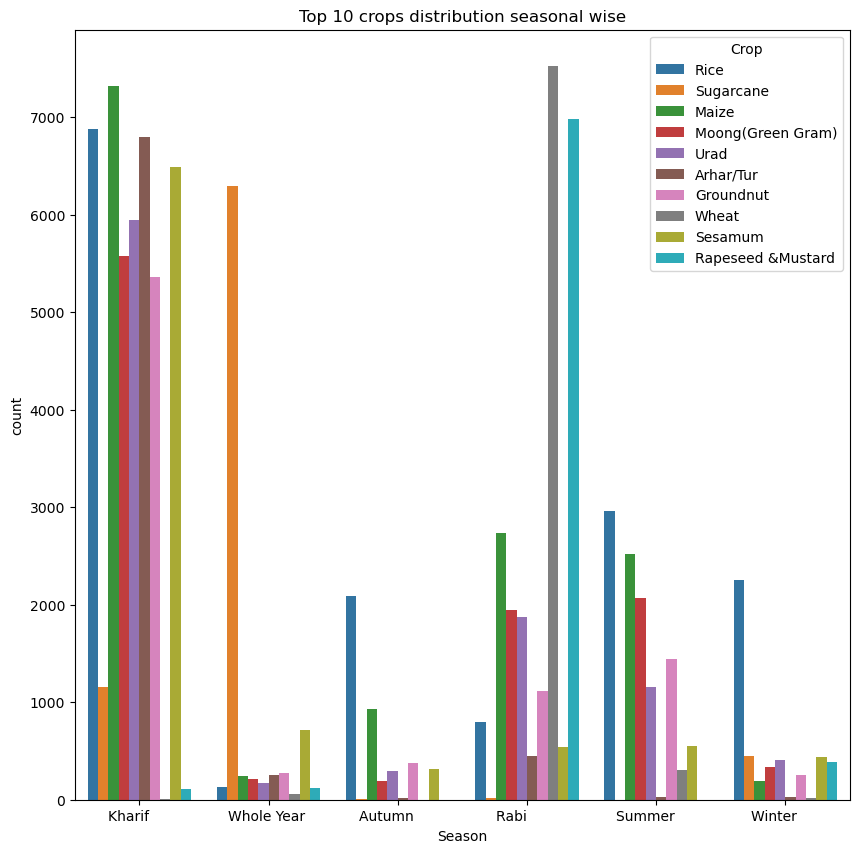

In [36]:
top_crops = df['Crop'].value_counts().nlargest(10).index
top_crops_df = df[df['Crop'].isin(top_crops)]
plt.figure(figsize =(10,10))
plt.title('Top 10 crops distribution seasonal wise')
sns.countplot(top_crops_df, hue = 'Crop', x = 'Season')
;

- "In the Kharif season, the production rates of Maize, Rice, Arhar/Tur, and Sesame are very high, while the production of Rapeseed and Mustard is very low."
- "Rice production is high in the Autumn and Winter seasons, but not as high as in the Kharif and Summer seasons."
- "Wheat and Rapeseed and Mustard production are high in the Rabi season."
- "Sugarcane production is consistently high throughout the year."


- # Multi-Variate Analysis

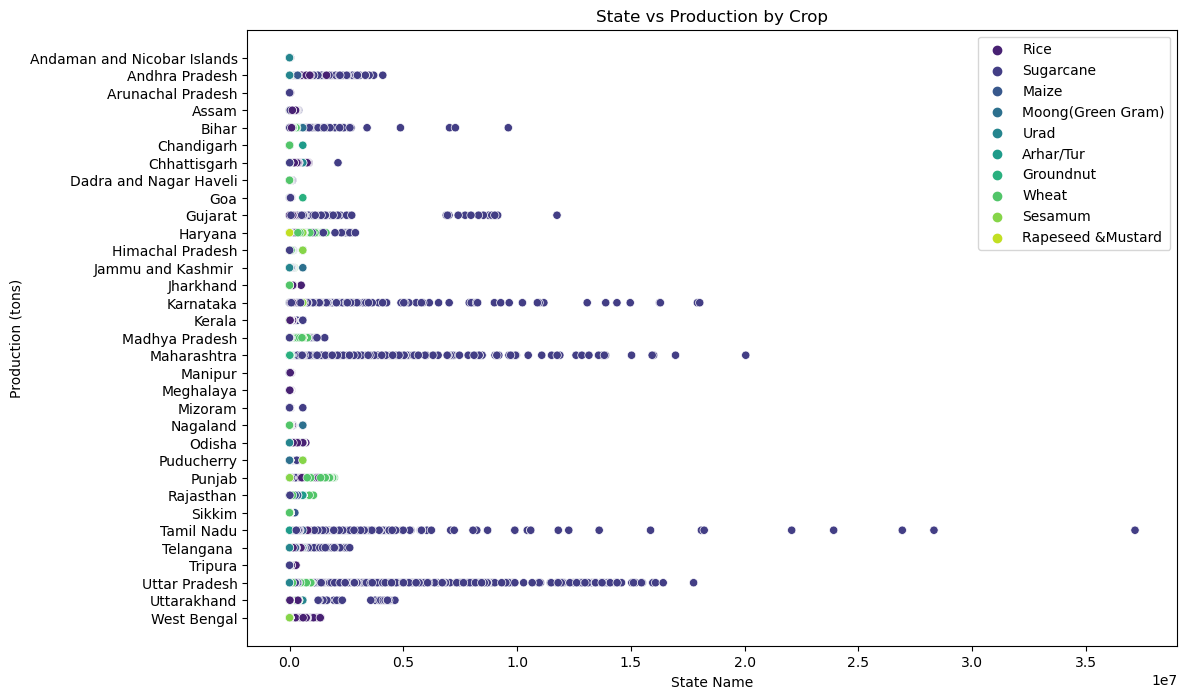

In [37]:
# Scatter plot colored by Crop
plt.figure(figsize=(12, 8))
sns.scatterplot(y='State_Name', x='Production', hue='Crop', data=top_crops_df, palette='viridis')
plt.title('State vs Production by Crop')
plt.xlabel('State Name')
plt.ylabel('Production (tons)')
plt.legend(loc='upper right')
plt.show()


- We see that the maximum number of states produce rice. Tamil Nadu, Maharashtra, Karnataka, Uttar Pradesh, and Gujarat are the states where rice is produced in large amounts.
- In Punjab and Haryana, the production of wheat, sesame, and rapeseed & mustard is popular.

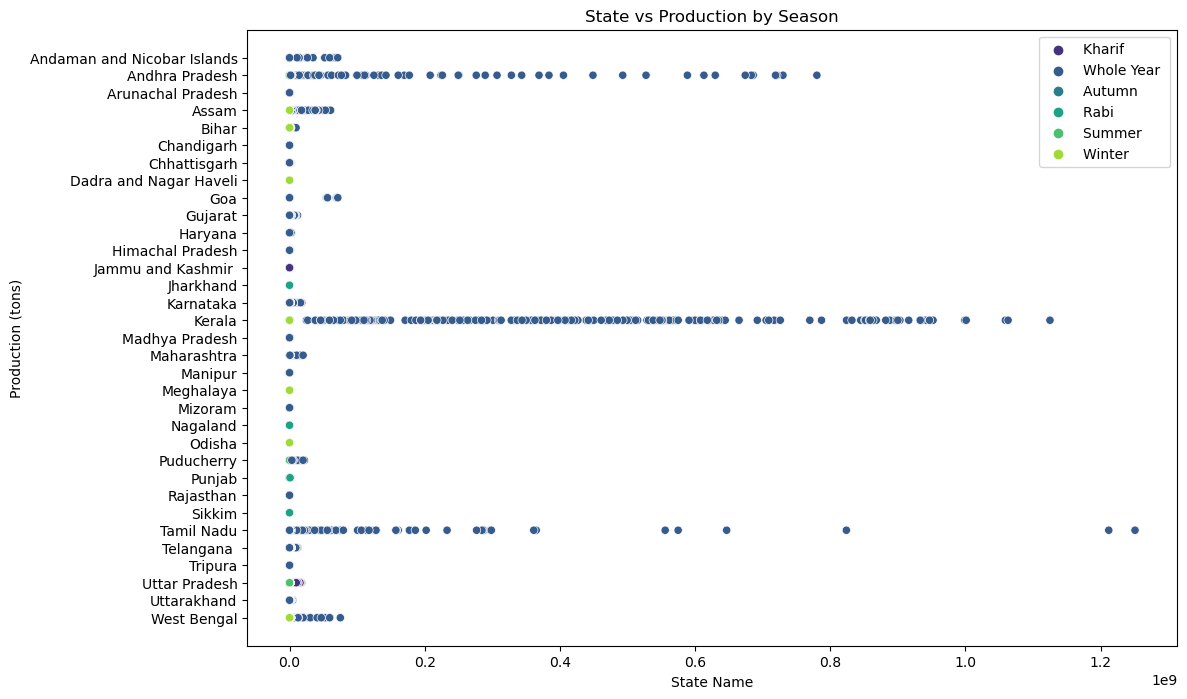

In [38]:
# Scatter plot colored by Crop
plt.figure(figsize=(12, 8))
sns.scatterplot(y='State_Name', x='Production', hue='Season', data=df, palette='viridis')
plt.title('State vs Production by Season')
plt.xlabel('State Name')
plt.ylabel('Production (tons)')
plt.legend(loc='upper right')
plt.show()


- "In Kerala, Andhra Pradesh, and Tamil Nadu, Kharif season crops are produced in large quantities. Overall, Kharif season crops are very popular in India."
- "However, crops are produced in different seasons across various states. For example, in Odisha, winter crops are produced. In West Bengal, both winter and Kharif season crops are produced."
- "States like Assam, Bihar, Mizoram, and Meghalaya produce both winter and summer crops."